Classification of skin lesions using Attention augmented ConvNeXt (Thesis)
=====================
The primary objective of this thesis is to increase the performance and resilience of Skin Lesions Classification utilizing strategies based on attention-based deep neural networks. 
## The task of classifying skin lesions is still challenging due to three reasons:
- Limited dataset. 
- Inter-class similarity between skin lesion images
- The region of skin lesion in images


Main contribution of the thesis
=====================
- The study proposes a deep learning model, Attention Augmented ConvNeXt(AACN) that utilizes different attention mechanisms to selectively focus on essential information (region of skin lesion).
- The study also introduces a hybrid loss function containing a cross entropy and  triplet loss to encourage the model to learn discriminative feature embeddings for classification and improve the separation of different classes in the feature space.
- Data preprocessing techniques, including data augmentation and normalization,  are employed on the dataset to avoid overfitting and to enable the identification of distinguishing features of the underrepresented classes.


Step 1: Installation Procedures
=====================
We will begin with the installation of the environment and the necessary tools for the execution of the activities.
- We use the Anaconda Navigator as an environment.
- As IDE we will use Spyder, but if desired can be used any other.
Anaconda download link: https://www.anaconda.com/products/individual#Downloads
After installing, an environment must be created through Anaconda Navigator and, in this environment, install the "CMD Prompt" that will be available on the main screen of the environment.
# Tools
Now, we will install the necessary tools to perform the activities. For each of the tools will be presented a brief summary of their applications and functionalities.

## <font color='red'>Pytorch and related</font>
PyTorch is an open source machine learning library based on the Torch library. It is a library widely used in applications that use computer vision and natural language processing. The library emerged and was presented after the development of some projects in Facebook's AI research laboratory.
###<font color='blue'>Torchvision</font>
The Torchvision library is part of the Pytorch project. Torchvision is a library created to work with computer vision.
For more information, please visit: https://pytorch.org/vision/master/
###<font color='blue'>CUDA Toolkit</font>
The CUDA Toolkit provides a development environment for creating GPU-accelerated applications (Graphics processing unit) or graphics processing unit. This is an alternative for users who have GPU-enabled graphics cards.
For more information, please visit: https://developer.nvidia.com/cuda-toolkit
To install these packages, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install pytorch torchvision cudatoolkit=10.2 -c pytorch</font>

## <font color='yellow'>Pandas</font>
Pandas is a Python package that provides important data analysis tools and easy-to-use high performance data structures.
For more information, please visit: https://pandas.pydata.org/
To install Pandas, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install pandas</font>

## <font color='yellow'> MatPlotLib </font>
Matplotlib is a library that allows animated or interactive visualization of statistical data in Python. In this work, the library will be used for creating and presenting graphs that can facilitate the understanding of some results obtained.
For more information, please visit: https://matplotlib.org/stable/index.html
To install Matplotlib, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install matplotlib</font>
##<font color='yellow'>Scikit Learn</font>
Scikit Learn or sklearn is a library for the Python programming language used for machine learning applications. It has several tools for implementing various classification algorithms, including those that were used in our work.
This is an excellent option for starting machine learning jobs and studies.
For more information, please visit: http://scikit-learn.org/
To install Sklearn, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install scikit-learn</font>
## <font color='yellow'>Seaborn</font>
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating charts that would be complex manipulation using the Matplotlib library in creating attractive and informative statistical information.
For more information, please visit: https://seaborn.pydata.org/
To install Seaborn, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install seaborn</font>
## <font color='yellow'>ImageIO</font>
ImageIO is a Python library that provides an easy interface to read and write a wide variety of image data, including animated images and scientific formats.
For more information, please visit: https://imageio.github.io I'm sorry. I'm sorry.
To install ImageIO, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install imageio</font>

In [1]:
# shutil.rmtree('./base_dir')

Para construção do primeiro bloco de código onde é realizada a importação de todas as bibliotecas que serão utilizadas, é importante que todas essas ferramentas estejam instaladas e funcionando corretamente. Observe o código de importação das bibliotecas abaixo:

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import scipy.ndimage
from scipy import misc
from glob import glob
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import imageio
import seaborn as sns
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [3]:
base_skin_dir = "../data"
os.listdir(base_skin_dir) #check where you put HAM10000 dataset

['HAM10000_images_part_2',
 'HAM10000_images_part_1',
 'hubconf.py',
 'hmnist_28_28_RGB.csv',
 'hmnist_28_28_L.csv',
 'hmnist_8_8_RGB.csv',
 'hmnist_8_8_L.csv',
 'HAM10000_metadata.csv']

In [4]:
# # Create a new directory
# base_dir = 'base_dir'


# #[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# # now we create 7 folders inside 'base_dir':

# # train_dir
#     # nv
#     # mel
#     # bkl
#     # bcc
#     # akiec
#     # vasc
#     # df
 
# # val_dir
#     # nv
#     # mel
#     # bkl
#     # bcc
#     # akiec
#     # vasc
#     # df

# # create a path to 'base_dir' to which we will join the names of the new folders
# # train_dir
# train_dir = os.path.join(base_dir, 'train_dir')


# # val_dir
# val_dir = os.path.join(base_dir, 'val_dir')




In [5]:
# os.mkdir(base_dir)
# os.mkdir(val_dir)
# os.mkdir(train_dir)

In [6]:

# # [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# # Inside each folder we create seperate folders for each class

# # create new folders inside train_dir
# nv = os.path.join(train_dir, 'nv')
# os.mkdir(nv)
# mel = os.path.join(train_dir, 'mel')
# os.mkdir(mel)
# bkl = os.path.join(train_dir, 'bkl')
# os.mkdir(bkl)
# bcc = os.path.join(train_dir, 'bcc')
# os.mkdir(bcc)
# akiec = os.path.join(train_dir, 'akiec')
# os.mkdir(akiec)
# vasc = os.path.join(train_dir, 'vasc')
# os.mkdir(vasc)
# df = os.path.join(train_dir, 'df')
# os.mkdir(df)



# # create new folders inside val_dir
# nv = os.path.join(val_dir, 'nv')
# os.mkdir(nv)
# mel = os.path.join(val_dir, 'mel')
# os.mkdir(mel)
# bkl = os.path.join(val_dir, 'bkl')
# os.mkdir(bkl)
# bcc = os.path.join(val_dir, 'bcc')
# os.mkdir(bcc)
# akiec = os.path.join(val_dir, 'akiec')
# os.mkdir(akiec)
# vasc = os.path.join(val_dir, 'vasc')
# os.mkdir(vasc)
# df = os.path.join(val_dir, 'df')
# os.mkdir(df)

In [7]:
df = pd.read_csv('../data/HAM10000_metadata.csv')



all_image_path = glob(os.path.join(base_skin_dir, '*', '*.jpg'))
#extracts the image id to match it with the .csv label file
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0] : x for x in all_image_path}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
# Creating New Columns for better readability

df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../data/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [8]:
# df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))

# # Sample images
# n_samples = 5
# fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
# for n_axs, (type_name, type_rows) in zip(m_axs, 
#                                          df.sort_values(['cell_type']).groupby('cell_type')):
#     n_axs[0].set_title(type_name)
#     for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
#         c_ax.imshow(c_row['image'])
#         c_ax.axis('off')
# fig.savefig('category_samples.png', dpi=500)

In [9]:
# label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']
# classes = [ 'ceratoses actínicas', 'carcinoma basocelular', 'lesoes de ceratose benignas', 
#                'dermatofibroma','melanoma', 'nevos melanocíticos', 'lesões vasculares']
# metadata = df
# num_classes = len(classes)

# def estimar_frequencia(label):
# # DEFINE AN ARRAY THE SAME SIZE AS THE LABEL, ONLY WITH ZERES.
#     class_freq = np.zeros_like(label, dtype=np.float64)
# # SET THE COUNTER, WHICH IS AN ARRAY THE SAME SIZE AS THE LABEL, BUT EMPTY   
#     count = np.zeros_like(label)
#     for i,l in enumerate(label):
#         #SET THE FREQUENCY (HOW MANY IMAGES) OF EACH CLASS
#         count[i] = metadata[metadata['dx']==str(l)]['dx'].value_counts()[0]
#     count = count.astype(np.float64)
#     #MAKE A TOTAL MEDIA
#     freq_media = np.median(count)
#     for i, label in enumerate(label):    
#         #DIVIDE THE TOTAL MEDIA BY EACH CLASS, COMING THERE AT THE BALANCED FREQUENCY.
#         class_freq[i] = freq_media / count[i]
#     return class_freq
    
# class_freq = estimar_frequencia(label)
   
# for i in range(len(label)):
#     print(label[i],":", class_freq[i])

<AxesSubplot:>

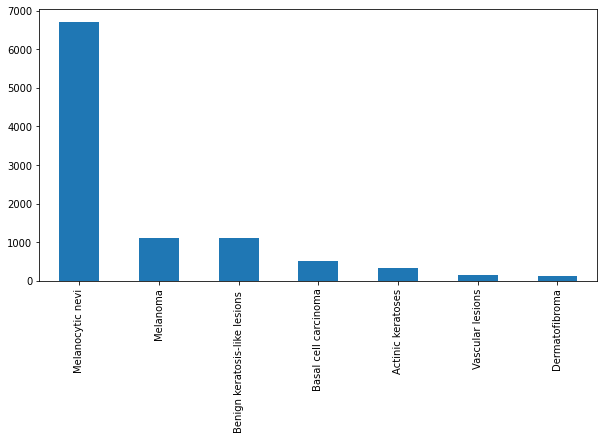

In [10]:
# Distribution of 7 classes
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

<AxesSubplot:>

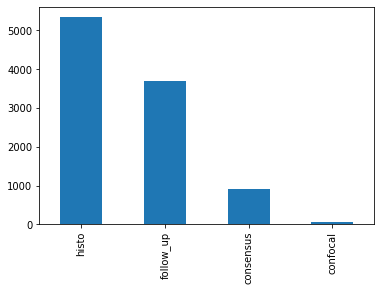

In [11]:
# Plotting of Technical Validation field (ground truth) which is dx_type to see the distribution of its 4 categories
# Histopathology,Confocal,Follow-up,Consensus

df['dx_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

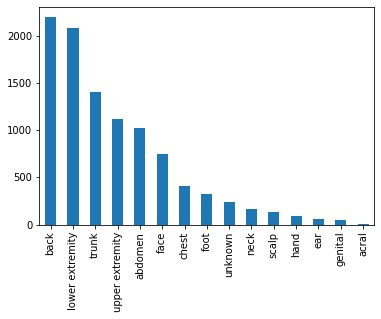

In [12]:

# Plotting the distribution of localization field

df['localization'].value_counts().plot(kind='bar')

<AxesSubplot:>

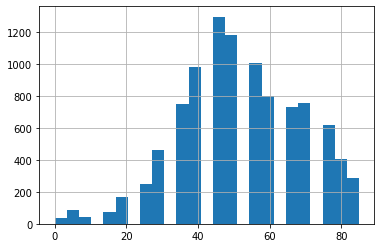

In [13]:
# Check the distribution of Age

df['age'].hist(bins=25)

<AxesSubplot:>

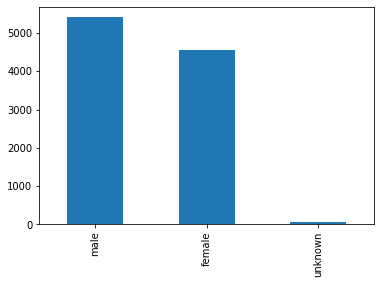

In [14]:
# Distribution of males and females

df['sex'].value_counts().plot(kind='bar')

/root/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='cell_type_idx'>

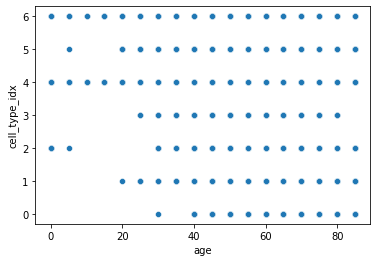

In [15]:
# Agewise distribution of skin cancer types

sns.scatterplot('age','cell_type_idx',data=df)

In [16]:
# this will tell us how many images are associated with each lesion_id
df_ = df.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df_ = df_[df_['image_id'] == 1]

df_.reset_index(inplace=True)

df_.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1,1


In [17]:
# here we identify lesion_id's that have duplicate images and those that have only
# one image.

def identify_duplicates(x):
    df_['lesion_id']
    
    unique_list = list(df_['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df['duplicates'] = df['lesion_id']
# apply the function to this new column
df['duplicates'] = df['duplicates'].apply(identify_duplicates)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../data/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2,has_duplicates


In [18]:
df['duplicates'].value_counts()


no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [19]:
# now we filter out images that don't have duplicates
df_ = df[df['duplicates'] == 'no_duplicates']

df_.shape

(5514, 11)

In [20]:
# now we create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df_['dx']

_, df_val = train_test_split(df_, test_size=0.15, random_state=101, stratify=y)

df_val.shape

(828, 11)

In [21]:
# This set will be df_data excluding all rows that are in the val set

# This function identifies if an image is part of the train
# or val set.
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# identify train and val rows

# create a new colum that is a copy of the image_id column
df['train_or_val'] = df['image_id']
# apply the function to this new column
df['train_or_val'] = df['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = df[df['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))

9187
828


In [22]:
df_train['dx'].value_counts()


nv       6042
mel      1079
bkl      1033
bcc       488
akiec     304
vasc      132
df        109
Name: dx, dtype: int64

In [23]:
df_val['dx'].value_counts()


nv       663
bkl       66
mel       34
bcc       26
akiec     23
vasc      10
df         6
Name: dx, dtype: int64

In [24]:
# Set the image_id as the index in df_data
df.set_index('image_id', inplace=True)


In [25]:
# # Get a list of images in each of the two folders
# folder_1 = os.listdir('../data/HAM10000_images_part_1')
# folder_2 = os.listdir('../data/HAM10000_images_part_2')

# # Get a list of train and val images
# train_list = list(df_train['image_id'])
# val_list = list(df_val['image_id'])



In [26]:
# import shutil
# # Transfer the train images

# for image in train_list:
    
#     fname = image + '.jpg'
#     label = df.loc[image,'dx']
    
#     if fname in folder_1:
#         # source path to image
#         src = os.path.join('../data/HAM10000_images_part_1', fname)
#         # destination path to image
#         dst = os.path.join(train_dir, label, fname)
#         # copy the image from the source to the destination
#         shutil.copyfile(src, dst)

#     if fname in folder_2:
#         # source path to image
#         src = os.path.join('../data/HAM10000_images_part_2', fname)
#         # destination path to image
#         dst = os.path.join(train_dir, label, fname)
#         # copy the image from the source to the destination
#         shutil.copyfile(src, dst)



In [27]:

# # Transfer the val images

# for image in val_list:
    
#     fname = image + '.jpg'
#     label = df.loc[image,'dx']
    
#     if fname in folder_1:
#         # source path to image
#         src = os.path.join('../data/HAM10000_images_part_1', fname)
#         # destination path to image
#         dst = os.path.join(val_dir, label, fname)
#         # copy the image from the source to the destination
#         shutil.copyfile(src, dst)

#     if fname in folder_2:
#         # source path to image
#         src = os.path.join('../data/HAM10000_images_part_2', fname)
#         # destination path to image
#         dst = os.path.join(val_dir, label, fname)
#         # copy the image from the source to the destination
#         shutil.copyfile(src, dst)
        

In [28]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6042
5945
5965
5906
5268
5330
4410


In [29]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

663
34
66
26
23
10
6


In [30]:
# import tensorflow

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # Copy the train images into aug_dir
# # note that we are not augmenting class 'nv'
# class_list = ['mel','bkl','bcc','akiec','vasc','df']

# for item in class_list:
    
#     # We are creating temporary directories here because we delete these directories later
#     # create a base dir
#     aug_dir = 'aug_dir'
#     os.mkdir(aug_dir)
#     # create a dir within the base dir to store images of the same class
#     img_dir = os.path.join(aug_dir, 'img_dir')
#     os.mkdir(img_dir)

#     # Choose a class
#     img_class = item

#     # list all images in that directory
#     img_list = os.listdir('base_dir/train_dir/' + img_class)

#     # Copy images from the class train dir to the img_dir e.g. class 'mel'
#     for fname in img_list:
#             # source path to image
#             src = os.path.join('base_dir/train_dir/' + img_class, fname)
#             # destination path to image
#             dst = os.path.join(img_dir, fname)
#             # copy the image from the source to the destination
#             shutil.copyfile(src, dst)


#     # point to a dir containing the images and not to the images themselves
#     path = aug_dir
#     save_path = 'base_dir/train_dir/' + img_class

#     # Create a data generator
#     datagen = ImageDataGenerator(
#         rotation_range=180,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         zoom_range=0.1,
#         horizontal_flip=True,
#         vertical_flip=True,
#         #brightness_range=(0.9,1.1),
#         fill_mode='nearest')

#     batch_size = 50

#     aug_datagen = datagen.flow_from_directory(path,
#                                            save_to_dir=save_path,
#                                            save_format='jpg',
#                                                     target_size=(224,224),
#                                                     batch_size=batch_size)



#     # Generate the augmented images and add them to the training folders
    
#     ###########
    
#     num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
#     ###########
    
#     num_files = len(os.listdir(img_dir))
#     num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

#     # run the generator and create about 6000 augmented images
#     for i in range(0,num_batches):

#         imgs, labels = next(aug_datagen)
        
#     # delete temporary directory with the raw image files
#     shutil.rmtree('aug_dir')

In [31]:
# Check how many train images we now have in each folder.
# This is the original images plus the augmented images.

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6042
5945
5965
5906
5268
5330
4410


In [32]:
# Check how many val images we have in each folder.

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

663
34
66
26
23
10
6


In [33]:


# def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')
        
# plots(imgs, titles=None) # titles=labels will display the image labels

In [34]:
# Set Up the Generators
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [35]:
# Normalisation of values for pretreated resnet network..
norm_mean = (0.4914, 0.4822, 0.4465)
norm_std = (0.2023, 0.1994, 0.2010)
transform_train = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(norm_mean, norm_std),
                    ])

transform_test = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                    ])

In [36]:
## Load train dataset
import torchvision

train_dataset  = torchvision.datasets.ImageFolder(root= train_path, transform=transform_train)

    ## Load the labels
# train_data_label = [s[1] for s in train_dataset.samples]
len(train_dataset)

38866

In [37]:
## Load validation dataset

test_dataset = torchvision.datasets.ImageFolder(root= valid_path,transform=transform_test)
    ## Load the labels
# test_data_label = [s[1] for s in test_dataset.samples]
len(test_dataset)

828

In [38]:

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True,num_workers=3,pin_memory=True)
validation_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=val_batch_size, shuffle=False,num_workers=3,pin_memory=True)
test_data_loader = ""
# Note: shuffle=False causes the test dataset to not be shuffled
# test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False,num_workers=3,pin_memory=True)

In [39]:
len(train_data_loader)

3887

In [40]:
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

labels

tensor([5, 6, 4, 4, 2, 0, 3, 0, 1, 3])

In [59]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

# All rights reserved.

# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from timm.models.layers import trunc_normal_, DropPath
from timm.models.registry import register_model


class CA(nn.Module):
    def __init__(self, channel, ratio=16):
        super(CA, self).__init__()
        self.channel = channel

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(self.channel, self.channel // ratio, True),
            nn.ReLU(),
            nn.Linear(self.channel // ratio, self.channel, True),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, w, h = x.size()
        inputs = x
        avg_ = self.avg_pool(x).view([b, c])
        max_ = self.max_pool(x).view([b, c])

        avg_fc_ = self.fc(avg_).view([b, c, 1, 1])
        max_fc_ = self.fc(max_).view([b, c, 1, 1])

        output = avg_fc_ + max_fc_

        return output * inputs


class SA(nn.Module):
    def __init__(self, kernel_size=3):
        super(SA, self).__init__()
        assert kernel_size in (3, 7, 15, 27, 31)
        padding = 3 if kernel_size == 7 else 1
        self.conv1 = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=padding)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        inputs = x
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        max_pool, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_pool, max_pool], dim=1)
        x = self.conv1(x)
        return inputs * self.sigmoid(x)


class SENET(nn.Module):
    def __init__(self, channel, ratio=16):
        super(SENET, self).__init__()
        self.channel = channel

        self.avg_pool = nn.AdaptiveAvgPool2d(1)  # 定义全局平均池化层，结果为[b, a, 1, 1] b表示batchsize, c表示通道数
        # 定义全连接层
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // ratio, True),
            nn.ReLU(),
            nn.Linear(channel // ratio, channel, True),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, w, h = x.size()
        inputs = x

        inpust_avg = self.avg_pool(x).view([b, c])

        inputs_fc = self.fc(inpust_avg).view([b, c, 1, 1])

        return inputs_fc * inputs


class ECANET(nn.Module):
    def __init__(self, channel, b=1, gamma=2):
        super(ECANET, self).__init__()
        self.channel = channel

        kernel_size = int(abs((math.log(channel, 2) + b) / gamma))
        kernel_size = kernel_size if kernel_size % 2 else kernel_size + 1
        padding = (kernel_size - 1) // 2

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv1d = nn.Conv1d(1, 1, kernel_size=kernel_size, padding=padding, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv1d(y.squeeze(-1).transpose(-1, -2)).transpose(-1, -2).unsqueeze(-1)
        y = self.sigmoid(y)

        return x * y.expand_as(x)


class CASA(nn.Module):
    def __init__(self, channel):
        super(CASA, self).__init__()
        self.CA = CA(channel)
        self.SA = SA(kernel_size=7)

    def forward(self, x):
        inputs = x
        ca_x = self.CA(x)
        output = ca_x * inputs
        sa_x = self.SA(output)
        output_ = sa_x * output

        return output_

class SACA(nn.Module):
    def __init__(self, channel):
        super(SACA, self).__init__()
        self.CA = CA(channel)
        self.SA = SA(kernel_size=7)

    def forward(self, x):
        inputs = x
        sa_x = self.SA(x)
        output = sa_x * inputs
        ca_x = self.CA(output)
        output_ = ca_x * output

        return output_



class Block(nn.Module):
    r""" ConvNeXt Block. There are two equivalent implementations:
    (1) DwConv -> LayerNorm (channels_first) -> 1x1 Conv -> GELU -> 1x1 Conv; all in (N, C, H, W)
    (2) DwConv -> Permute to (N, H, W, C); LayerNorm (channels_last) -> Linear -> GELU -> Linear; Permute back
    We use (2) as we find it slightly faster in PyTorch

    Args:
        dim (int): Number of input channels.
        drop_path (float): Stochastic depth rate. Default: 0.0
        layer_scale_init_value (float): Init value for Layer Scale. Default: 1e-6.
    """

    def __init__(self, dim, drop_path=0., layer_scale_init_value=1e-6):
        super().__init__()
        self.dwconv = nn.Conv2d(dim, dim, kernel_size=7, padding=3, groups=dim)  # depthwise conv
        self.norm = LayerNorm(dim, eps=1e-6)
        self.pwconv1 = nn.Linear(dim, 4 * dim)  # pointwise/1x1 convs, implemented with linear layers
        self.act = nn.GELU()
        self.pwconv2 = nn.Linear(4 * dim, dim)
        self.gamma = nn.Parameter(layer_scale_init_value * torch.ones((dim)),
                                  requires_grad=True) if layer_scale_init_value > 0 else None
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        input = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 3, 1)  # (N, C, H, W) -> (N, H, W, C)
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.pwconv2(x)
        if self.gamma is not None:
            x = self.gamma * x
        x = x.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

        x = input + self.drop_path(x)
        return x


class ConvNeXtAa(nn.Module):
    r""" ConvNeXt
        A PyTorch impl of : `A ConvNet for the 2020s`  -
          https://arxiv.org/pdf/2201.03545.pdf

    Args:
        in_chans (int): Number of input image channels. Default: 3
        num_classes (int): Number of classes for classification head. Default: 1000
        depths (tuple(int)): Number of blocks at each stage. Default: [3, 3, 9, 3]
        dims (int): Feature dimension at each stage. Default: [96, 192, 384, 768]
        drop_path_rate (float): Stochastic depth rate. Default: 0.
        layer_scale_init_value (float): Init value for Layer Scale. Default: 1e-6.
        head_init_scale (float): Init scaling value for classifier weights and biases. Default: 1.
    """

    def __init__(self, in_chans=3, num_classes=1000,
                 depths=[3, 3, 9, 3], dims=[96, 192, 384, 768], drop_path_rate=0.,
                 layer_scale_init_value=1e-6, head_init_scale=1., aa="ca"
                 ):
        super().__init__()
        if aa == "ca":
            print("====> based on Channel Attention!")
            self.AA = CA(channel=dims[-1])
        elif aa == "sa":
            print("====> based on Spatial Attention!")
            self.AA = SA(kernel_size=3)
        elif aa == "senet":
            print("====> based on SENet!")
            self.AA = SENET(channel=dims[-1])
        elif aa == "ecanet":
            print("====> based on ECANet!")
            self.AA = ECANET(channel=dims[-1])
        elif aa == "casa":
            print("====> based on Channel Attention and Spatial Attention!")
            self.AA = CASA(channel=dims[-1])
        elif aa == "saca":
            print("====> based on Spatial Attention and Channel Attention!")
            self.AA = SACA(channel=dims[-1])
        elif aa == "fcanet":
            print("====> based on Frequency Attention and Channel Attention!")
            self.AA = FcaLayer(channel=dims[-1],reduction=16,width=224,height=224)
            print(dims[-1])
        else:
            raise ValueError

        self.downsample_layers = nn.ModuleList()  # stem and 3 intermediate downsampling conv layers
        stem = nn.Sequential(
            nn.Conv2d(in_chans, dims[0], kernel_size=4, stride=4),
            LayerNorm(dims[0], eps=1e-6, data_format="channels_first")
        )
        self.downsample_layers.append(stem)
        for i in range(3):
            downsample_layer = nn.Sequential(
                LayerNorm(dims[i], eps=1e-6, data_format="channels_first"),
                nn.Conv2d(dims[i], dims[i + 1], kernel_size=2, stride=2),
            )
            self.downsample_layers.append(downsample_layer)

        self.stages = nn.ModuleList()  # 4 feature resolution stages, each consisting of multiple residual blocks
        dp_rates = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        cur = 0
        for i in range(4):
            stage = nn.Sequential(
                *[Block(dim=dims[i], drop_path=dp_rates[cur + j],
                        layer_scale_init_value=layer_scale_init_value) for j in range(depths[i])]
            )
            self.stages.append(stage)
            cur += depths[i]

        self.norm = nn.LayerNorm(dims[-1], eps=1e-6)  # final norm layer
        self.head = nn.Linear(dims[-1], num_classes)

        self.apply(self._init_weights)
        self.head.weight.data.mul_(head_init_scale)
        self.head.bias.data.mul_(head_init_scale)

    def _init_weights(self, m):
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            trunc_normal_(m.weight, std=.02)
            nn.init.constant_(m.bias, 0)

    def forward_features(self, x):
        for i in range(4):
            x = self.downsample_layers[i](x)
            x = self.stages[i](x)
        # return self.norm(x.mean([-2, -1]))  # global average pooling, (N, C, H, W) -> (N, C)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = x + self.AA(x)
        x = self.norm(x.mean([-2, -1]))
        x = self.head(x)
        return x

    def freeze_backbone(self):
        backbone = [self.downsample_layers, self.stages]
        for module in backbone:
            try:
                for param in module.parameters():
                    param.requires_grad = False
            except:
                module.requires_grad = False

    def unfreeze_backbone(self):
        backbone = [self.downsample_layers, self.stages]
        for module in backbone:
            try:
                for param in module.parameters():
                    param.requires_grad = True
            except:
                module.requires_grad = True


class LayerNorm(nn.Module):
    r""" LayerNorm that supports two data formats: channels_last (default) or channels_first.
    The ordering of the dimensions in the inputs. channels_last corresponds to inputs with
    shape (batch_size, height, width, channels) while channels_first corresponds to inputs
    with shape (batch_size, channels, height, width).
    """

    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))
        self.eps = eps
        self.data_format = data_format
        if self.data_format not in ["channels_last", "channels_first"]:
            raise NotImplementedError
        self.normalized_shape = (normalized_shape,)

    def forward(self, x):
        if self.data_format == "channels_last":
            return F.layer_norm(x, self.normalized_shape, self.weight, self.bias, self.eps)
        elif self.data_format == "channels_first":
            u = x.mean(1, keepdim=True)
            s = (x - u).pow(2).mean(1, keepdim=True)
            x = (x - u) / torch.sqrt(s + self.eps)
            x = self.weight[:, None, None] * x + self.bias[:, None, None]
            return x


def convnextaa_base(num_classes: int, pretrained=True, aa="ca"):
    # https://dl.fbaipublicfiles.com/convnext/convnext_base_1k_224_ema.pth
    # https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_224.pth
    model = ConvNeXtAa(depths=[3, 3, 27, 3],
                       dims=[128, 256, 512, 1024],
                       num_classes=num_classes, aa=aa)
    if pretrained:
        # model.load_state_dict(torch.load("/data/CNX_V3/model_data/convnext_base_1k_224_ema.pth")["model"])
        # weights_dict = torch.load("/data/CNX_ImageNet100/model_data/convnext_base_1k_224_ema.pth")["model"]
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#         weights_dict = torch.load("../nets/cnxECANet-least_valloss.pth",map_location=device)
        weights_dict = torch.load("./checkpoint.pt",map_location=device)

#         we don't need these weights
#         for k in list(weights_dict.keys()):
#             if "head" in k:
#                 del weights_dict[k]
#             elif "norm.weight" == k:
#                 del weights_dict[k]
#             elif "norm.bias" == k:
#                 del weights_dict[k]
        model.load_state_dict(weights_dict, strict=False)
    return model


In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = convnextaa_base(num_classes=1000, pretrained=True, aa="ecanet")
model.head = nn.Linear(model.head.in_features, 7) ## changing it output layer to skin classes
model = model.to(device)

====> based on ECANet!


In [43]:
# import torch.optim as optim
# # Add weights to try to make the model more sensitive to melanoma

# lr = 1e-4
# Init_Epoch = 0
# Freeze_Epoch = 50
class_weights= [1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0] # Try to make the model more sensitive to Melanoma
class_weights = torch.FloatTensor(class_weights)
# optimizer = optim.Adam(model.parameters(), lr, weight_decay=5e-4)
# lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.94)

class_weights = class_weights.to(device)
# criterion = nn.CrossEntropyLoss(weight = class_weights)
class_weights

tensor([1., 1., 1., 1., 3., 1., 1.], device='cuda:0')

In [44]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.a_best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.val_acc_max = 0
        self.delta = delta

    def __call__(self, val_loss,val_accuracy,model):

        score = -val_loss
        a_score = val_accuracy

        if self.best_score is None:
            self.best_score = score
            self.a_best_score = a_score
            self.save_checkpoint(val_accuracy, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
            if a_score > self.a_best_score:
                self.a_best_score = a_score
                self.save_checkpoint(val_accuracy, model)
                
        else:
            self.best_score = score
            if a_score > self.a_best_score:
                self.a_best_score = a_score
                self.save_checkpoint(val_accuracy, model)
            self.counter = 0

    def save_checkpoint(self, val_accuracy, model):
        '''Saves model when validation acurracy increase.'''
        if self.verbose:
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_accuracy:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')	# 这里会存储迄今最优模型的参数
        self.val_acc_max = val_accuracy


In [45]:

# class FocalLoss:
#     def __init__(self, alpha_t=None, gamma=0):
#         """
#         :param alpha_t: A list of weights for each class
#         :param gamma:
#         """
#         self.alpha_t = alpha_t 
#         self.gamma = gamma

#     def __call__(self, outputs, targets):
#         if self.alpha_t is None and self.gamma == 0:
#             focal_loss = torch.nn.functional.cross_entropy(outputs, targets)

#         elif self.alpha_t is not None and self.gamma == 0:
#             if self.alpha_t.device != outputs.device:
#                 self.alpha_t = self.alpha_t.to(outputs)
#             focal_loss = torch.nn.functional.cross_entropy(outputs, targets,
#                                                            weight=self.alpha_t)

#         elif self.alpha_t is None and self.gamma != 0:
#             ce_loss = torch.nn.functional.cross_entropy(outputs, targets, reduction='none')
#             p_t = torch.exp(-ce_loss)
#             focal_loss = ((1 - p_t) ** self.gamma * ce_loss).mean()

#         elif self.alpha_t is not None and self.gamma != 0:
#             if self.alpha_t.device != outputs.device:
#                 self.alpha_t = self.alpha_t.to(outputs)
#             ce_loss = torch.nn.functional.cross_entropy(outputs, targets, reduction='none')
#             p_t = torch.exp(-ce_loss)
#             ce_loss = torch.nn.functional.cross_entropy(outputs, targets,
#                                                         weight=self.alpha_t, reduction='none')
#             focal_loss = ((1 - p_t) ** self.gamma * ce_loss).mean()  # mean over the batch

#         return focal_loss



In [46]:

# class FocalLoss:
#     def __init__(self, alpha_t=None, gamma=0):
#         """
#         :param alpha_t: A list of weights for each class
#         :param gamma:
#         """
#         self.alpha_t = alpha_t 
#         self.gamma = gamma

#     def __call__(self, outputs, targets):
#         if self.alpha_t is None and self.gamma == 0:
#             focal_loss = torch.nn.functional.cross_entropy(outputs, targets)

#         elif self.alpha_t is not None and self.gamma == 0:
#             if self.alpha_t.device != outputs.device:
#                 self.alpha_t = self.alpha_t.to(outputs)
#             focal_loss = torch.nn.functional.cross_entropy(outputs, targets,
#                                                            weight=self.alpha_t)

#         elif self.alpha_t is None and self.gamma != 0:
#             ce_loss = torch.nn.functional.cross_entropy(outputs, targets, reduction='none')
#             p_t = torch.exp(-ce_loss)
#             focal_loss = ((1 - p_t) ** self.gamma * ce_loss).mean()

#         elif self.alpha_t is not None and self.gamma != 0:
#             if self.alpha_t.device != outputs.device:
#                 self.alpha_t = self.alpha_t.to(outputs)
#             ce_loss = torch.nn.functional.cross_entropy(outputs, targets, reduction='none')
#             p_t = torch.exp(-ce_loss)
#             ce_loss = torch.nn.functional.cross_entropy(outputs, targets,
#                                                         weight=self.alpha_t, reduction='none')
#             focal_loss = ((1 - p_t) ** self.gamma * ce_loss).mean()  # mean over the batch

#         return focal_loss



In [47]:
import torch
import torch.nn as nn

def pairwise_distance_torch(embeddings, device):
    """Computes the pairwise distance matrix with numerical stability.
    output[i, j] = || feature[i, :] - feature[j, :] ||_2
    Args:
      embeddings: 2-D Tensor of size [number of data, feature dimension].
    Returns:
      pairwise_distances: 2-D Tensor of size [number of data, number of data].
    """

    # pairwise distance matrix with precise embeddings
    precise_embeddings = embeddings.to(dtype=torch.float32)

    c1 = torch.pow(precise_embeddings, 2).sum(axis=-1)
    c2 = torch.pow(precise_embeddings.transpose(0, 1), 2).sum(axis=0)
    c3 = precise_embeddings @ precise_embeddings.transpose(0, 1)

    c1 = c1.reshape((c1.shape[0], 1))
    c2 = c2.reshape((1, c2.shape[0]))
    c12 = c1 + c2
    pairwise_distances_squared = c12 - 2.0 * c3

    # Deal with numerical inaccuracies. Set small negatives to zero.
    pairwise_distances_squared = torch.max(pairwise_distances_squared, torch.tensor([0.]).to(device))
    # Get the mask where the zero distances are at.
    error_mask = pairwise_distances_squared.clone()
    error_mask[error_mask > 0.0] = 1.
    error_mask[error_mask <= 0.0] = 0.

    pairwise_distances = torch.mul(pairwise_distances_squared, error_mask)

    # Explicitly set diagonals to zero.
    mask_offdiagonals = torch.ones((pairwise_distances.shape[0], pairwise_distances.shape[1])) - torch.diag(torch.ones(pairwise_distances.shape[0]))
    pairwise_distances = torch.mul(pairwise_distances.to(device), mask_offdiagonals.to(device))
    return pairwise_distances

def TripletSemiHardLoss(y_true, y_pred, device, margin=1.0):
    """Computes the triplet loss_functions with semi-hard negative mining.
       The loss_functions encourages the positive distances (between a pair of embeddings
       with the same labels) to be smaller than the minimum negative distance
       among which are at least greater than the positive distance plus the
       margin constant (called semi-hard negative) in the mini-batch.
       If no such negative exists, uses the largest negative distance instead.
       See: https://arxiv.org/abs/1503.03832.
       We expect labels `y_true` to be provided as 1-D integer `Tensor` with shape
       [batch_size] of multi-class integer labels. And embeddings `y_pred` must be
       2-D float `Tensor` of l2 normalized embedding vectors.
       Args:
         margin: Float, margin term in the loss_functions definition. Default value is 1.0.
         name: Optional name for the op.
       """

    labels, embeddings = y_true, y_pred

    # Reshape label tensor to [batch_size, 1].
    lshape = labels.shape
    labels = torch.reshape(labels, [lshape[0], 1])

    pdist_matrix = pairwise_distance_torch(embeddings, device)

    # Build pairwise binary adjacency matrix.
    adjacency = torch.eq(labels, labels.transpose(0, 1))
    # Invert so we can select negatives only.
    adjacency_not = adjacency.logical_not()

    batch_size = labels.shape[0]

    # Compute the mask.
    pdist_matrix_tile = pdist_matrix.repeat(batch_size, 1)
    adjacency_not_tile = adjacency_not.repeat(batch_size, 1)

    transpose_reshape = pdist_matrix.transpose(0, 1).reshape(-1, 1)
    greater = pdist_matrix_tile > transpose_reshape

    mask = adjacency_not_tile & greater

    # final mask
    mask_step = mask.to(dtype=torch.float32)
    mask_step = mask_step.sum(axis=1)
    mask_step = mask_step > 0.0
    mask_final = mask_step.reshape(batch_size, batch_size)
    mask_final = mask_final.transpose(0, 1)

    adjacency_not = adjacency_not.to(dtype=torch.float32)
    mask = mask.to(dtype=torch.float32)

    # negatives_outside: smallest D_an where D_an > D_ap.
    axis_maximums = torch.max(pdist_matrix_tile, dim=1, keepdim=True)
    masked_minimums = torch.min(torch.mul(pdist_matrix_tile - axis_maximums[0], mask), dim=1, keepdim=True)[0] + axis_maximums[0]
    negatives_outside = masked_minimums.reshape([batch_size, batch_size])
    negatives_outside = negatives_outside.transpose(0, 1)

    # negatives_inside: largest D_an.
    axis_minimums = torch.min(pdist_matrix, dim=1, keepdim=True)
    masked_maximums = torch.max(torch.mul(pdist_matrix - axis_minimums[0], adjacency_not), dim=1, keepdim=True)[0] + axis_minimums[0]
    negatives_inside = masked_maximums.repeat(1, batch_size)

    semi_hard_negatives = torch.where(mask_final, negatives_outside, negatives_inside)

    loss_mat = margin + pdist_matrix - semi_hard_negatives

    mask_positives = adjacency.to(dtype=torch.float32) - torch.diag(torch.ones(batch_size)).to(device)
    num_positives = mask_positives.sum()

    triplet_loss = (torch.max(torch.mul(loss_mat, mask_positives), torch.tensor([0.]).to(device))).sum() / num_positives
    triplet_loss = triplet_loss.to(dtype=embeddings.dtype)
    return triplet_loss


class TripletLoss:
    def __init__(self, device):
#         super().__init__()
        self.device = device

    def __call__(self, output, target):
        return TripletSemiHardLoss(target, output, self.device)
        
#     def forward(self, input, target, **kwargs):
#         return TripletSemiHardLoss(target, input, self.device)

In [48]:
import torch
import torch.nn.functional as F
from torch import nn,optim
from tqdm import tqdm



def fit_one_epoch(model_train, model, optimizer, epoch, epoch_step, epoch_step_val, gen, gen_val, Epoch,
                  cuda,class_weights):
    total_loss = 0
    total_accuracy = 0
    val_accuracy = 0
    val_loss = 0

    model_train.train()
#     print('Start Train')
    with tqdm(total=epoch_step, desc=f'Epoch {epoch + 1}/{Epoch}', postfix=dict, mininterval=0.3) as pbar:
        for iteration, batch in enumerate(gen):
            if iteration >= epoch_step:
                break
            images, targets = batch
            with torch.no_grad():
#                 images = torch.from_numpy(images).type(torch.FloatTensor)
#                 targets = torch.from_numpy(targets).type(torch.FloatTensor).long()
                if cuda:
                    images = images.cuda()
                    targets = targets.cuda()

            optimizer.zero_grad()
            outputs = model_train(images)
            loss_value =  nn.CrossEntropyLoss(class_weights, 2)(outputs, targets) + TripletLoss(device) (outputs, targets)
            loss_value.backward()
            optimizer.step()

            total_loss += loss_value.item()
            with torch.no_grad():
                accuracy = torch.mean(
                    (torch.argmax(F.softmax(outputs, dim=-1), dim=-1) == targets).type(torch.FloatTensor))
                total_accuracy += accuracy.item()

#             pbar.set_postfix(**{'total_loss': total_loss / (iteration + 1),
#                                 'accuracy': total_accuracy / (iteration + 1),
#                                 'lr': get_lr(optimizer)})
#             pbar.update(1)
    train_acc = total_accuracy / epoch_step
    train_loss = total_loss / epoch_step
#     print('Finish Train')
    model_train.eval()
#     print('Start Validation')
    with tqdm(total=epoch_step_val, desc=f'Epoch {epoch + 1}/{Epoch}', postfix=dict, mininterval=0.3) as pbar:
        for iteration, batch in enumerate(gen_val):
            if iteration >= epoch_step_val:
                break
            images, targets = batch
            with torch.no_grad():
#                 images = torch.from_numpy(images).type(torch.FloatTensor)
#                 targets = torch.from_numpy(targets).type(torch.FloatTensor).long()
                if cuda:
                    images = images.cuda()
                    targets = targets.cuda()

                optimizer.zero_grad()

                outputs = model_train(images)
                loss_value =  nn.CrossEntropyLoss(weight=class_weights)(outputs, targets) + TripletLoss(device) (outputs, targets)

                val_loss += loss_value.item()
            with torch.no_grad():
                accuracy = torch.mean(
                    (torch.argmax(F.softmax(outputs, dim=-1), dim=-1) == targets).type(torch.FloatTensor))
                val_accuracy += accuracy.item()

#             pbar.set_postfix(**{'total_loss': val_loss / (iteration + 1),
#                                     'lr': get_lr(optimizer)})
#             pbar.update(1)

#     loss_history.append_loss(total_loss / epoch_step, val_loss / epoch_step_val)
    total_val_loss = val_loss/epoch_step_val
    total_val_acc = val_accuracy/epoch_step_val
    return train_acc,train_loss,total_val_acc,total_val_loss

    

In [50]:
import torch.backends.cudnn as cudnn
if True:
    model_train = torch.nn.DataParallel(model)
    cudnn.benchmark = True
    model_train = model_train.cuda()

In [51]:
delta = 0.001
patience = 30
early_stopping = EarlyStopping(patience, verbose=True,delta=delta)
t_accuracy = []
v_accuracy = []
t_losses = []
v_losses = []
Freeze_Train =True
if True:
    

        # lr = 1e-3
    lr = 1e-4
    Batch_size = 16
    Init_Epoch = 0
    Freeze_Epoch = 150
        

    epoch_step = len(train_dataset) // Batch_size
    epoch_step_val = len(test_dataset) // Batch_size

    if epoch_step == 0 or epoch_step_val == 0:
        raise ValueError("数据集过小，无法进行训练，请扩充数据集。")

    optimizer = optim.Adam(model_train.parameters(), lr, weight_decay=5e-4)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.94)

 
    if Freeze_Train:
        model.unfreeze_backbone()

    for epoch in range(Init_Epoch, Freeze_Epoch):
        train_acc,train_loss,total_val_acc,total_val_loss =fit_one_epoch(model_train, model, optimizer, epoch, epoch_step, epoch_step_val, train_data_loader, validation_data_loader,
                          Freeze_Epoch, device, class_weights)
        
        lr_scheduler.step()
        early_stopping(total_val_loss,total_val_acc, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break
  
        print('Current Epoch: %d' %(epoch+1))
        print('Result of the Loss function for training set: %.3f' %(train_loss))
        print('Result of the Accuracy metric for the training set: %.3f' %(train_acc))
        print('Result of the Loss function for validation set: %.3f' %(total_val_loss))  
        print('Result of the Precision metric for the validation calculation: %.3f' %(total_val_acc))
        
        # put in percentage

        t_losses.append(train_loss)
        v_losses.append(total_val_loss)
        t_accuracy.append(train_acc)
        v_accuracy.append(total_val_acc)
print('Transfer learning Training Completed')
    

Epoch 1/150:   0%|          | 0/2429 [00:00<?, ?it/s<class 'dict'>]/root/miniconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
Epoch 1/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


Validation accuracy increased (0.000000 --> 0.831373).  Saving model ...
Current Epoch: 1
Result of the Loss function for training set: 1.097
Result of the Accuracy metric for the training set: 0.628
Result of the Loss function for validation set: 0.534
Result of the Precision metric for the validation calculation: 0.831


Epoch 2/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 1 out of 30
Current Epoch: 2
Result of the Loss function for training set: 0.699
Result of the Accuracy metric for the training set: 0.763
Result of the Loss function for validation set: 0.659
Result of the Precision metric for the validation calculation: 0.794


Epoch 3/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


Validation accuracy increased (0.831373 --> 0.872549).  Saving model ...
Current Epoch: 3
Result of the Loss function for training set: 0.637
Result of the Accuracy metric for the training set: 0.791
Result of the Loss function for validation set: 0.380
Result of the Precision metric for the validation calculation: 0.873


Epoch 4/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 1 out of 30
Current Epoch: 4
Result of the Loss function for training set: 0.547
Result of the Accuracy metric for the training set: 0.816
Result of the Loss function for validation set: 0.469
Result of the Precision metric for the validation calculation: 0.841


Epoch 5/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


Validation accuracy increased (0.872549 --> 0.880392).  Saving model ...
Current Epoch: 5
Result of the Loss function for training set: 0.464
Result of the Accuracy metric for the training set: 0.846
Result of the Loss function for validation set: 0.353
Result of the Precision metric for the validation calculation: 0.880


Epoch 6/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 1 out of 30
Current Epoch: 6
Result of the Loss function for training set: 0.452
Result of the Accuracy metric for the training set: 0.856
Result of the Loss function for validation set: 0.423
Result of the Precision metric for the validation calculation: 0.865


Epoch 7/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


Current Epoch: 7
Result of the Loss function for training set: 0.413
Result of the Accuracy metric for the training set: 0.862
Result of the Loss function for validation set: 0.330
Result of the Precision metric for the validation calculation: 0.875


Epoch 8/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 1 out of 30
Current Epoch: 8
Result of the Loss function for training set: 0.351
Result of the Accuracy metric for the training set: 0.880
Result of the Loss function for validation set: 0.448
Result of the Precision metric for the validation calculation: 0.869


Epoch 9/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 2 out of 30
Current Epoch: 9
Result of the Loss function for training set: 0.346
Result of the Accuracy metric for the training set: 0.884
Result of the Loss function for validation set: 0.453
Result of the Precision metric for the validation calculation: 0.875


Epoch 10/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 3 out of 30
Current Epoch: 10
Result of the Loss function for training set: 0.307
Result of the Accuracy metric for the training set: 0.895
Result of the Loss function for validation set: 0.438
Result of the Precision metric for the validation calculation: 0.867


Epoch 11/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 4 out of 30
Current Epoch: 11
Result of the Loss function for training set: 0.306
Result of the Accuracy metric for the training set: 0.895
Result of the Loss function for validation set: 0.398
Result of the Precision metric for the validation calculation: 0.871


Epoch 12/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


Validation accuracy increased (0.880392 --> 0.888235).  Saving model ...
Current Epoch: 12
Result of the Loss function for training set: 0.274
Result of the Accuracy metric for the training set: 0.906
Result of the Loss function for validation set: 0.327
Result of the Precision metric for the validation calculation: 0.888


Epoch 13/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


Validation accuracy increased (0.888235 --> 0.921569).  Saving model ...
Current Epoch: 13
Result of the Loss function for training set: 0.237
Result of the Accuracy metric for the training set: 0.920
Result of the Loss function for validation set: 0.268
Result of the Precision metric for the validation calculation: 0.922


Epoch 14/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 1 out of 30
Current Epoch: 14
Result of the Loss function for training set: 0.234
Result of the Accuracy metric for the training set: 0.922
Result of the Loss function for validation set: 0.407
Result of the Precision metric for the validation calculation: 0.882


Epoch 15/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 2 out of 30
Current Epoch: 15
Result of the Loss function for training set: 0.209
Result of the Accuracy metric for the training set: 0.928
Result of the Loss function for validation set: 0.286
Result of the Precision metric for the validation calculation: 0.918


Epoch 16/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 3 out of 30
Current Epoch: 16
Result of the Loss function for training set: 0.187
Result of the Accuracy metric for the training set: 0.937
Result of the Loss function for validation set: 0.309
Result of the Precision metric for the validation calculation: 0.902


Epoch 17/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 4 out of 30
Current Epoch: 17
Result of the Loss function for training set: 0.195
Result of the Accuracy metric for the training set: 0.935
Result of the Loss function for validation set: 0.442
Result of the Precision metric for the validation calculation: 0.871


Epoch 18/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 5 out of 30
Current Epoch: 18
Result of the Loss function for training set: 0.165
Result of the Accuracy metric for the training set: 0.944
Result of the Loss function for validation set: 0.327
Result of the Precision metric for the validation calculation: 0.908


Epoch 19/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 6 out of 30
Current Epoch: 19
Result of the Loss function for training set: 0.148
Result of the Accuracy metric for the training set: 0.950
Result of the Loss function for validation set: 0.339
Result of the Precision metric for the validation calculation: 0.902


Epoch 20/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 7 out of 30
Current Epoch: 20
Result of the Loss function for training set: 0.145
Result of the Accuracy metric for the training set: 0.951
Result of the Loss function for validation set: 0.385
Result of the Precision metric for the validation calculation: 0.890


Epoch 21/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 8 out of 30
Current Epoch: 21
Result of the Loss function for training set: 0.131
Result of the Accuracy metric for the training set: 0.958
Result of the Loss function for validation set: 0.358
Result of the Precision metric for the validation calculation: 0.900


Epoch 22/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 9 out of 30
Current Epoch: 22
Result of the Loss function for training set: 0.136
Result of the Accuracy metric for the training set: 0.956
Result of the Loss function for validation set: 0.363
Result of the Precision metric for the validation calculation: 0.894


Epoch 23/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 10 out of 30
Current Epoch: 23
Result of the Loss function for training set: 0.101
Result of the Accuracy metric for the training set: 0.967
Result of the Loss function for validation set: 0.355
Result of the Precision metric for the validation calculation: 0.898


Epoch 24/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 11 out of 30
Validation accuracy increased (0.921569 --> 0.927451).  Saving model ...
Current Epoch: 24
Result of the Loss function for training set: 0.105
Result of the Accuracy metric for the training set: 0.964
Result of the Loss function for validation set: 0.298
Result of the Precision metric for the validation calculation: 0.927


Epoch 25/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 12 out of 30
Current Epoch: 25
Result of the Loss function for training set: 0.095
Result of the Accuracy metric for the training set: 0.968
Result of the Loss function for validation set: 0.551
Result of the Precision metric for the validation calculation: 0.867


Epoch 26/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 13 out of 30
Current Epoch: 26
Result of the Loss function for training set: 0.091
Result of the Accuracy metric for the training set: 0.970
Result of the Loss function for validation set: 0.374
Result of the Precision metric for the validation calculation: 0.890


Epoch 27/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 14 out of 30
Current Epoch: 27
Result of the Loss function for training set: 0.080
Result of the Accuracy metric for the training set: 0.974
Result of the Loss function for validation set: 0.319
Result of the Precision metric for the validation calculation: 0.908


Epoch 28/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 15 out of 30
Current Epoch: 28
Result of the Loss function for training set: 0.077
Result of the Accuracy metric for the training set: 0.976
Result of the Loss function for validation set: 0.309
Result of the Precision metric for the validation calculation: 0.918


Epoch 29/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 16 out of 30
Current Epoch: 29
Result of the Loss function for training set: 0.073
Result of the Accuracy metric for the training set: 0.976
Result of the Loss function for validation set: 0.301
Result of the Precision metric for the validation calculation: 0.920


Epoch 30/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 17 out of 30
Current Epoch: 30
Result of the Loss function for training set: 0.061
Result of the Accuracy metric for the training set: 0.980
Result of the Loss function for validation set: 0.369
Result of the Precision metric for the validation calculation: 0.906


Epoch 31/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 18 out of 30
Current Epoch: 31
Result of the Loss function for training set: 0.062
Result of the Accuracy metric for the training set: 0.981
Result of the Loss function for validation set: 0.337
Result of the Precision metric for the validation calculation: 0.918


Epoch 32/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 19 out of 30
Current Epoch: 32
Result of the Loss function for training set: 0.060
Result of the Accuracy metric for the training set: 0.980
Result of the Loss function for validation set: 0.318
Result of the Precision metric for the validation calculation: 0.914


Epoch 33/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 20 out of 30
Current Epoch: 33
Result of the Loss function for training set: 0.041
Result of the Accuracy metric for the training set: 0.987
Result of the Loss function for validation set: 0.333
Result of the Precision metric for the validation calculation: 0.910


Epoch 34/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 21 out of 30
Current Epoch: 34
Result of the Loss function for training set: 0.057
Result of the Accuracy metric for the training set: 0.982
Result of the Loss function for validation set: 0.287
Result of the Precision metric for the validation calculation: 0.912


Epoch 35/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 22 out of 30
Current Epoch: 35
Result of the Loss function for training set: 0.039
Result of the Accuracy metric for the training set: 0.987
Result of the Loss function for validation set: 0.391
Result of the Precision metric for the validation calculation: 0.898


Epoch 36/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 23 out of 30
Current Epoch: 36
Result of the Loss function for training set: 0.051
Result of the Accuracy metric for the training set: 0.984
Result of the Loss function for validation set: 0.390
Result of the Precision metric for the validation calculation: 0.904


Epoch 37/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 24 out of 30
Current Epoch: 37
Result of the Loss function for training set: 0.036
Result of the Accuracy metric for the training set: 0.989
Result of the Loss function for validation set: 0.372
Result of the Precision metric for the validation calculation: 0.910


Epoch 38/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 25 out of 30
Current Epoch: 38
Result of the Loss function for training set: 0.035
Result of the Accuracy metric for the training set: 0.989
Result of the Loss function for validation set: 0.341
Result of the Precision metric for the validation calculation: 0.912


Epoch 39/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 26 out of 30
Current Epoch: 39
Result of the Loss function for training set: 0.034
Result of the Accuracy metric for the training set: 0.989
Result of the Loss function for validation set: 0.441
Result of the Precision metric for the validation calculation: 0.896


Epoch 40/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 27 out of 30
Current Epoch: 40
Result of the Loss function for training set: 0.029
Result of the Accuracy metric for the training set: 0.991
Result of the Loss function for validation set: 0.364
Result of the Precision metric for the validation calculation: 0.908


Epoch 41/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 28 out of 30
Current Epoch: 41
Result of the Loss function for training set: 0.030
Result of the Accuracy metric for the training set: 0.991
Result of the Loss function for validation set: 0.368
Result of the Precision metric for the validation calculation: 0.916


Epoch 42/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]


EarlyStopping counter: 29 out of 30
Current Epoch: 42
Result of the Loss function for training set: 0.029
Result of the Accuracy metric for the training set: 0.991
Result of the Loss function for validation set: 0.399
Result of the Precision metric for the validation calculation: 0.910


Epoch 43/150:   0%|          | 0/51 [00:02<?, ?it/s<class 'dict'>]

EarlyStopping counter: 30 out of 30
Early stopping
Transfer learning Training Completed


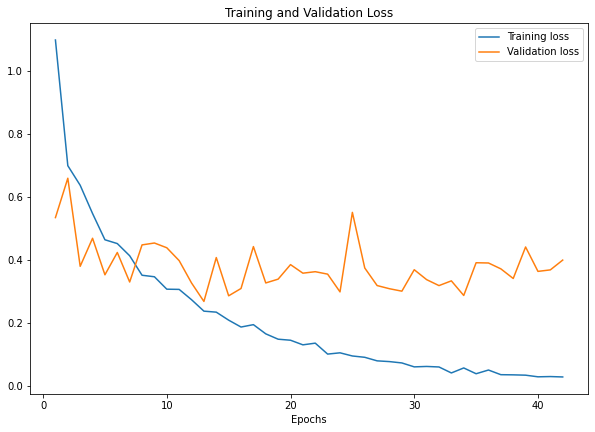

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

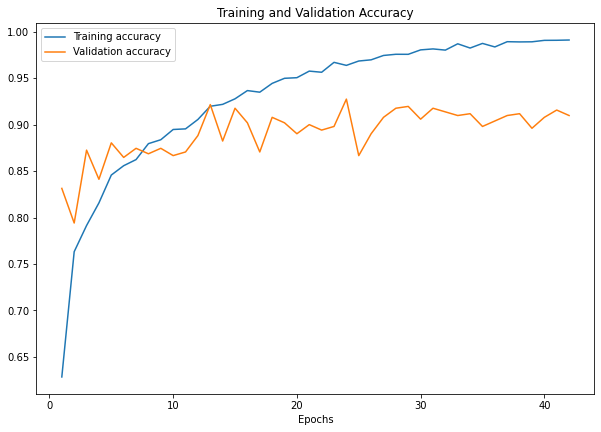

<Figure size 432x288 with 0 Axes>

In [55]:
epoch = range(1, len(v_accuracy)+1)
fig = plt.figure(figsize=(10, 15))
plt.subplot(2,1,2)
plt.plot(epoch, t_losses, label='Training loss')
plt.plot(epoch, v_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.show()

fig = plt.figure(figsize=(10, 15))
plt.subplot(2,1,2)
plt.plot(epoch, t_accuracy, label='Training accuracy')
plt.plot(epoch, v_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()


In [56]:
np.save("./experiment/triplet/t_acc_base.npy", t_accuracy) 
np.save("./experiment/triplet/t_loss_base.npy", t_losses)
np.save("./experiment/triplet/v_loss_base.npy", v_losses) 
np.save("./experiment/triplet/v_acc_base.npy", v_accuracy)

In [57]:
import shutil
shutil.copy("./checkpoint.pt",'./experiment/triplet/conv_check.pt')

'./experiment/triplet/conv_check.pt'

In [52]:
#From Last epoch
model.eval()
y_label = []
y_predict = []

with torch.no_grad():
    for i,(images,labels) in enumerate(validation_data_loader):
        print(images.size)
        n = images.size(0)
        images = images.to(device)
        output = model(images)
        pred = torch.argmax(output, dim=1)
        y_label.extend(labels.cpu().numpy())
        y_predict.extend(pred.cpu().numpy())
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']

<built-in method size of Tensor object at 0x7fc9f00b7c80>
<built-in method size of Tensor object at 0x7fc873008940>
<built-in method size of Tensor object at 0x7fc9f00b7680>
<built-in method size of Tensor object at 0x7fc8f8d7abc0>
<built-in method size of Tensor object at 0x7fc8f8da3480>
<built-in method size of Tensor object at 0x7fc873008940>
<built-in method size of Tensor object at 0x7fc8f8da3480>
<built-in method size of Tensor object at 0x7fc9f009b040>
<built-in method size of Tensor object at 0x7fc8f8da3b00>
<built-in method size of Tensor object at 0x7fc8758663c0>
<built-in method size of Tensor object at 0x7fc9f009ce00>
<built-in method size of Tensor object at 0x7fc9f00b7c80>
<built-in method size of Tensor object at 0x7fc9f05efd80>
<built-in method size of Tensor object at 0x7fc9f009bdc0>
<built-in method size of Tensor object at 0x7fc875778cc0>
<built-in method size of Tensor object at 0x7fc9f009c4c0>
<built-in method size of Tensor object at 0x7fc9f009bd40>
<built-in meth

In [53]:
from sklearn.metrics import classification_report

#Classification report
report = classification_report(y_label, y_predict, target_names=plot_labels)
print(report)

              precision    recall  f1-score   support

       akiec       0.79      0.65      0.71        23
         bcc       0.82      0.88      0.85        26
         bkl       0.79      0.83      0.81        66
          df       0.75      0.50      0.60         6
          nv       0.63      0.65      0.64        34
        vasc       0.98      0.98      0.98       663
         mel       1.00      1.00      1.00        10

    accuracy                           0.94       828
   macro avg       0.82      0.78      0.80       828
weighted avg       0.94      0.94      0.94       828



In [54]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_true = y_label
y_pred = y_predict
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_pred,multi_class='ovr',average='weighted')))

Precision: 0.9362571864882664
Recall: 0.9359903381642513
Accuracy: 0.9359903381642513


AxisError: axis 1 is out of bounds for array of dimension 1

In [58]:
torch.save(model.state_dict(), './experiment/triplet/convlast.pt')


In [59]:
# shutil.copy("./checkpoint.pt",'./experiment/casa/fine/convcasa_fine.pt')

'./experiment/casa/fine/convcasa_fine.pt'

In [61]:
#From check point
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modeloa = convnextaa_base(num_classes=7, pretrained=True, aa="ecanet")
# modeloa.head = nn.Linear(modeloa.head.in_features, 7) ## changing it output layer to skin classes
modeloa = modeloa.to(device)

====> based on ECANet!


**Function to display the loss curve for training and validation sets.**

In [98]:
modeloa.eval()
y_label = []
y_predict = []
y_prob =[]

with torch.no_grad():
    for i,(images,labels) in enumerate(validation_data_loader):
        print(images.size)
        n = images.size(0)
        images = images.to(device)
        output = modeloa(images)
        y_prob.append(output)
        pred = torch.argmax(output, dim=1)
        y_label.extend(labels.cpu().numpy())
        y_predict.extend(pred.cpu().numpy())
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']

<built-in method size of Tensor object at 0x7fc8f8dcfbc0>
<built-in method size of Tensor object at 0x7fc8f3ce9b80>
<built-in method size of Tensor object at 0x7fc8f3ce9880>
<built-in method size of Tensor object at 0x7fc8ec410440>
<built-in method size of Tensor object at 0x7fc8f8dcfbc0>
<built-in method size of Tensor object at 0x7fc8f3ce9b80>
<built-in method size of Tensor object at 0x7fc8ec410900>
<built-in method size of Tensor object at 0x7fc8ec410e80>
<built-in method size of Tensor object at 0x7fc8f8dcfbc0>
<built-in method size of Tensor object at 0x7fc8f3ce9b80>
<built-in method size of Tensor object at 0x7fc8ec410800>
<built-in method size of Tensor object at 0x7fc8ec4108c0>
<built-in method size of Tensor object at 0x7fc8ec410f80>
<built-in method size of Tensor object at 0x7fc8ec410600>
<built-in method size of Tensor object at 0x7fc8ec419380>
<built-in method size of Tensor object at 0x7fc8ec410600>
<built-in method size of Tensor object at 0x7fc8ec4197c0>
<built-in meth

In [83]:
#half focal
from sklearn.metrics import classification_report

#Classification report
report = classification_report(y_label, y_predict, target_names=plot_labels)
print(report)

              precision    recall  f1-score   support

       akiec       0.83      0.83      0.83        23
         bcc       0.83      0.96      0.89        26
         bkl       0.88      0.77      0.82        66
          df       0.60      0.50      0.55         6
          nv       0.80      0.71      0.75        34
        vasc       0.98      0.99      0.98       663
         mel       1.00      1.00      1.00        10

    accuracy                           0.95       828
   macro avg       0.84      0.82      0.83       828
weighted avg       0.95      0.95      0.95       828



In [84]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_true = y_label
y_pred = np.array(y_predict)
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_pred,multi_class='ovr',average='weighted')))

Precision: 0.9501394144197741
Recall: 0.9516908212560387
Accuracy: 0.9516908212560387


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
##trying other codes